<a href="https://colab.research.google.com/github/justdelly/My-IE423-Tasks/blob/main/notebooks/hackhaton_fifth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

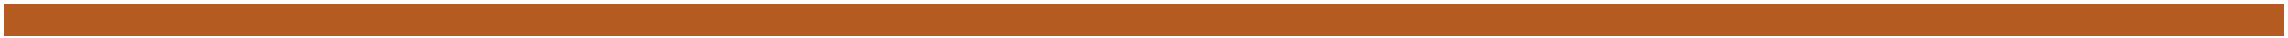

In [164]:
# Find the index of the row containing 'Doğalgaz Sobası' in the relevant column
index_to_drop3 = dfMlb[dfMlb['Yapı Tipi'] == 'Prefabrik'].index

# Drop the row from X_test
dfMlb = dfMlb.drop(index_to_drop3)

# Now you can proceed with label encoding on the modified X_test_dropped
# ... (rest of your label encoding code)


In [165]:
# Find the index of the row containing 'Doğalgaz Sobası' in the relevant column
index_to_drop = dfMlb[dfMlb['Yapının Durumu'] == 'Yapım Aşamasında'].index

# Drop the row from X_test
dfMlb = dfMlb.drop(index_to_drop)

# Now you can proceed with label encoding on the modified X_test_dropped
# ... (rest of your label encoding code)

In [171]:
# Find the index of the row containing 'Doğalgaz Sobası' in the relevant column
index_to_drop2 = dfMlb[dfMlb['Mahalle'] == 'İlkyerleşim'].index

# Drop the row from X_test
dfMlb = dfMlb.drop(index_to_drop2)

# Now you can proceed with label encoding on the modified X_test_dropped
# ... (rest of your label encoding code)

In [172]:
# Count occurrences of each 'Mahalle'
mahalle_counts = dfMlb['Mahalle'].value_counts()

# Filter for 'Mahalle' values that occur only once
unique_mahalles = mahalle_counts[mahalle_counts == 1].index

# Drop rows with unique 'Mahalle' values
dfMlb_filtered = dfMlb[~dfMlb['Mahalle'].isin(unique_mahalles)]

In [166]:
# Get unique 'Mahalle' values in training data
train_mahalles = set(X_train['Mahalle'].unique())

# Filter test data to keep only 'Mahalle' values present in training data
X_test_filtered = X_test[X_test['Mahalle'].isin(train_mahalles)]

In [48]:
# Find the index of the row containing 'Doğalgaz Sobası' in the relevant column
index_to_drop = dfMlb[dfMlb['Yapı Tipi'] == 'Prefabrik'].index

# Drop the row from X_test
dfMlb = dfMlb.drop(index_to_drop)

# Now you can proceed with label encoding on the modified X_test_dropped
# ... (rest of your label encoding code)

## <font color='#475468'> House Prices:</font>
### <font color='#475468'> Can you predict the rent prices?</font>

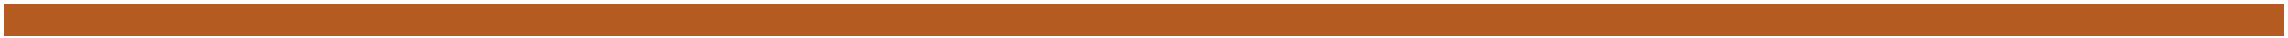

## Initialize

In [288]:
import pandas as pd
import numpy as np

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Load Data

In [289]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [290]:
dfMlb = pd.read_csv('/content/drive/MyDrive/Datasets/final_ankara3 (1).csv')


In [291]:
dfMlb.rename(columns={'Depozito': 'fiyat'}, inplace=True)

In [292]:
dfMlb['Cephe'] = dfMlb.groupby('Mahalle')['Cephe'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'unknown'))


In [293]:
# prompt: drop the rows that have missing values for Banyo Sayısı

dfMlb.dropna(subset=['Banyo Sayısı'], inplace=True)


In [294]:
# prompt: drop the column İlan no

dfMlb = dfMlb.drop('İlan no', axis=1)


In [295]:
dfMlb.head()

,fiyat,Cephe,Banyo Sayısı,Kullanım Durumu,Kat Sayısı,Bina Yaşı,Isınma Tipi,Site İçerisinde,Aidat,Yapı Tipi,Ilce,Yapının Durumu,Mahalle,Eşya Durumu,Oda + Salon Sayısı,Bulunduğu Kat
0,35000.0,"Güney, Batı",1.0,Boş,6,10,Merkezi (Pay Ölçer),1,1700.000000,Betonarme,Yenimahalle,İkinci El,Turgut Özal,Eşyalı Değil,2 + 1,Villa Katı
1,20000.0,Doğu,1.0,Boş,5,0,Kombi,1,891.847311,Betonarme,Çankaya,İkinci El,Yaşamkent,Eşyalı,1 + 1,5. Kat
2,20000.0,Güney,1.0,Boş,4,0,Kombi,1,891.847311,Betonarme,Çankaya,İkinci El,Yaşamkent,Eşyalı,1 + 1,2. Kat
3,25000.0,Batı,1.0,Boş,4,35,Merkezi,1,2000.000000,Betonarme,Çankaya,İkinci El,Kavaklıdere,Eşyalı Değil,3 + 1,3. Kat
4,25000.0,Batı,1.0,Boş,4,30,Merkezi,1,2000.000000,Betonarme,Çankaya,İkinci El,Kavaklıdere,Eşyalı Değil,3 + 1,3. Kat


In [296]:
# prompt: how many missing values for each column

dfMlb.isnull().sum()


fiyat                 0
Cephe                 0
Banyo Sayısı          0
Kullanım Durumu       0
Kat Sayısı            0
Bina Yaşı             0
Isınma Tipi           0
Site İçerisinde       0
Aidat                 0
Yapı Tipi             0
Ilce                  0
Yapının Durumu        0
Mahalle               0
Eşya Durumu           0
Oda + Salon Sayısı    0
Bulunduğu Kat         0
dtype: int64

# Exploratory Data Analysis

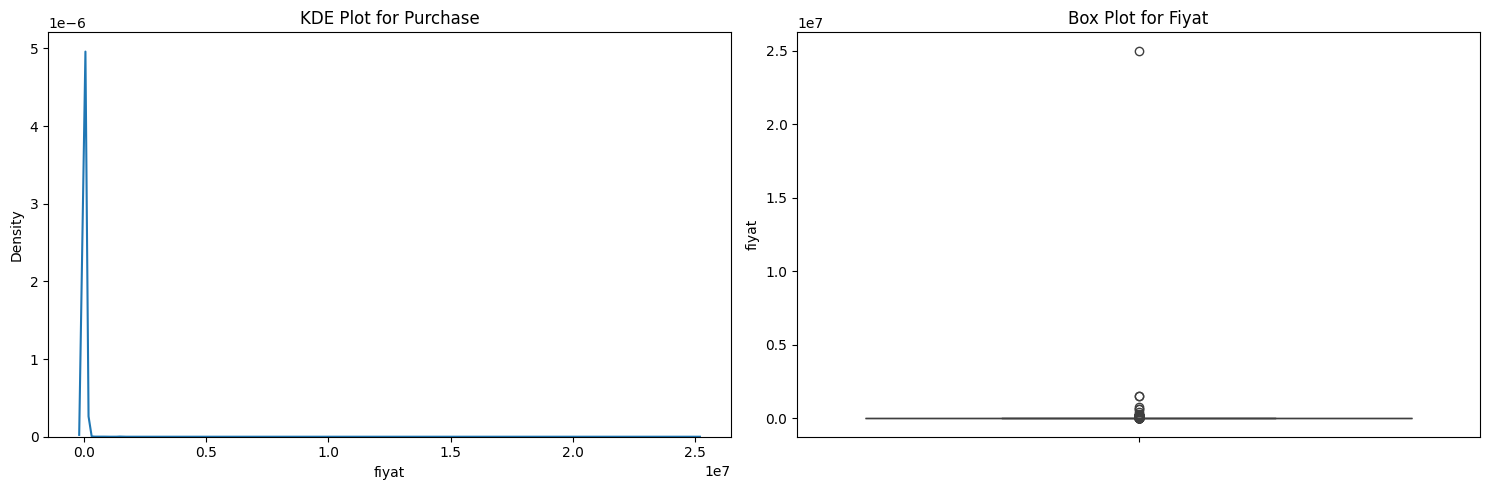

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))

plt.subplot(121)  # Subplot 1: KDE plot
sns.kdeplot(data=dfMlb['fiyat'])
plt.title('KDE Plot for Purchase')

plt.subplot(122)  # Subplot 2: Box plot
sns.boxplot(data=dfMlb['fiyat'])
plt.title('Box Plot for Fiyat')

plt.tight_layout()  # Automatically adjust subplot parameters for better layout
plt.show()

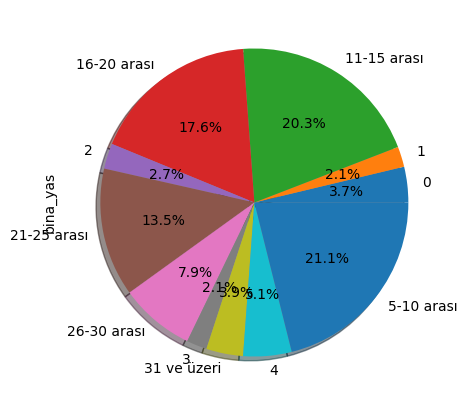

In [ ]:
dfMlb.groupby('bina_yas').agg({'bina_yas':'count'}).bina_yas.plot(kind='pie',autopct='%1.1f%%',figsize=(5,5),shadow=True)
plt.show()

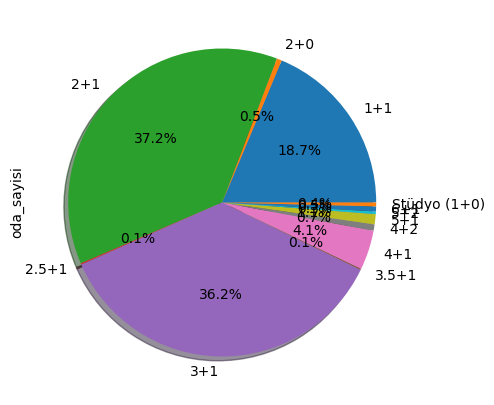

In [ ]:
dfMlb.groupby('oda_sayisi').agg({'oda_sayisi':'count'}).oda_sayisi.plot(kind='pie',autopct='%1.1f%%',figsize=(5,5),shadow=True)
plt.show()

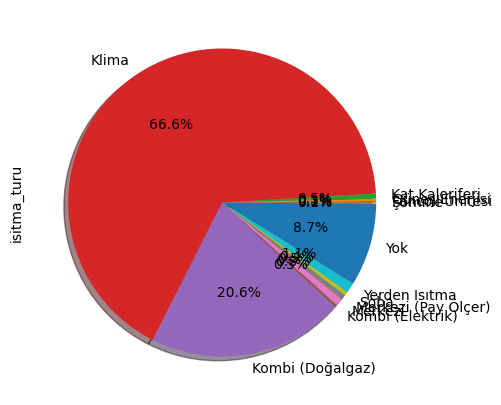

In [ ]:
dfMlb.groupby('isitma_turu').agg({'isitma_turu':'count'}).isitma_turu.plot(kind='pie',autopct='%1.1f%%',figsize=(5,5),shadow=True)
plt.show()

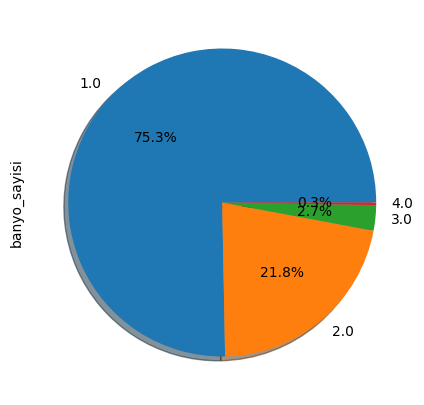

In [ ]:
dfMlb.groupby('banyo_sayisi').agg({'banyo_sayisi':'count'}).banyo_sayisi.plot(kind='pie',autopct='%1.1f%%',figsize=(5,5),shadow=True)
plt.show()

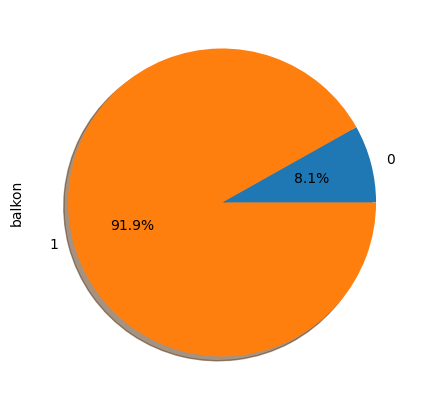

In [ ]:
dfMlb.groupby('balkon').agg({'balkon':'count'}).balkon.plot(kind='pie',autopct='%1.1f%%',figsize=(5,5),shadow=True)
plt.show()

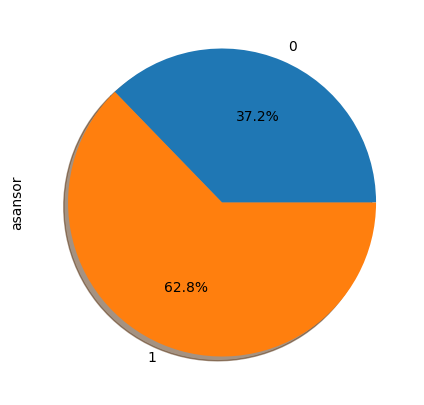

In [ ]:
dfMlb.groupby('asansor').agg({'asansor':'count'}).asansor.plot(kind='pie',autopct='%1.1f%%',figsize=(5,5),shadow=True)
plt.show()

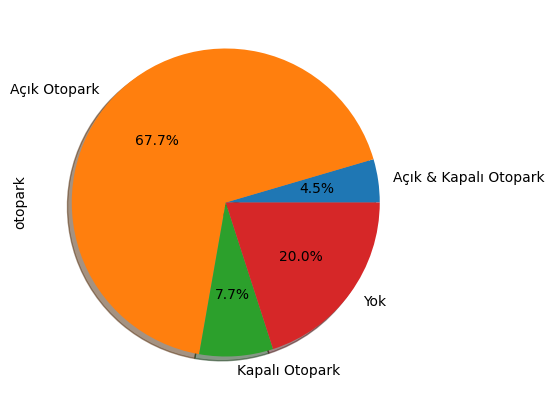

In [ ]:
dfMlb.groupby('otopark').agg({'otopark':'count'}).otopark.plot(kind='pie',autopct='%1.1f%%',figsize=(5,5),shadow=True)
plt.show()

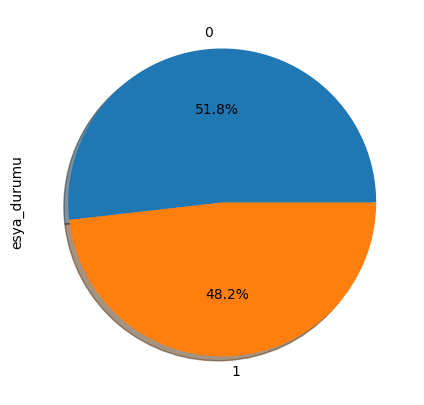

In [ ]:
dfMlb.groupby('esya_durumu').agg({'esya_durumu':'count'}).esya_durumu.plot(kind='pie',autopct='%1.1f%%',figsize=(5,5),shadow=True)
plt.show()

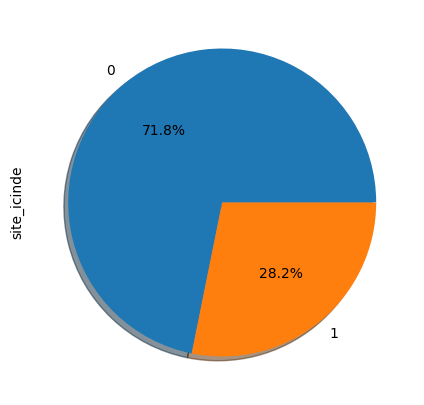

In [ ]:
dfMlb.groupby('site_icinde').agg({'site_icinde':'count'}).site_icinde.plot(kind='pie',autopct='%1.1f%%',figsize=(5,5),shadow=True)
plt.show()

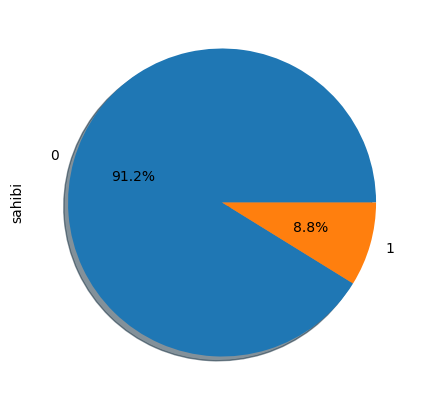

In [ ]:
dfMlb.groupby('sahibi').agg({'sahibi':'count'}).sahibi.plot(kind='pie',autopct='%1.1f%%',figsize=(5,5),shadow=True)
plt.show()

In [43]:
p_id=dfMlb.value_counts('oda_sayisi').sort_values(ascending=False).head(50)
plt.figure(figsize=(5,10))
sns.barplot(y=p_id.index,x=p_id)
plt.show()

KeyError: 'oda_sayisi'

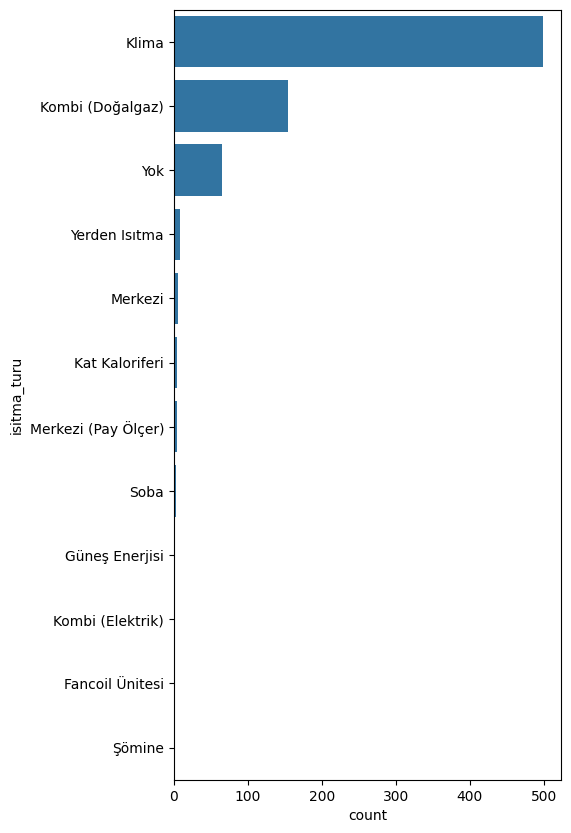

In [ ]:
p_id=dfMlb.value_counts('isitma_turu').sort_values(ascending=False).head(50)
plt.figure(figsize=(5,10))
sns.barplot(y=p_id.index,x=p_id)
plt.show()

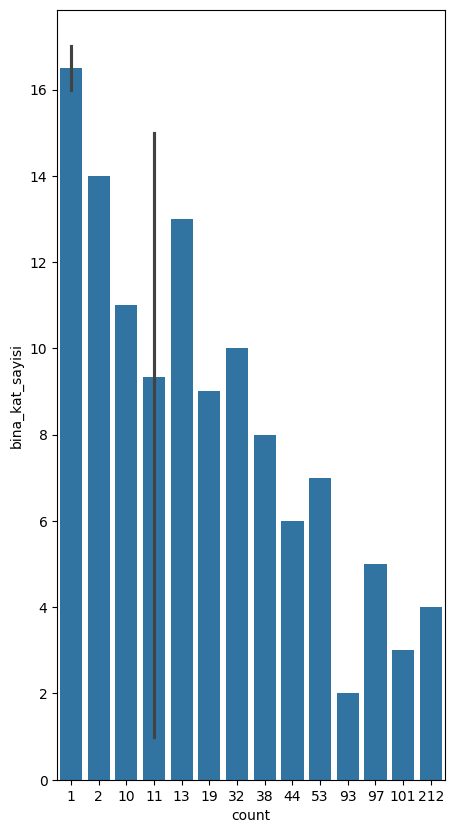

In [ ]:
p_id=dfMlb.value_counts('bina_kat_sayisi').sort_values(ascending=False).head(50)
plt.figure(figsize=(5,10))
sns.barplot(y=p_id.index,x=p_id)
plt.show()

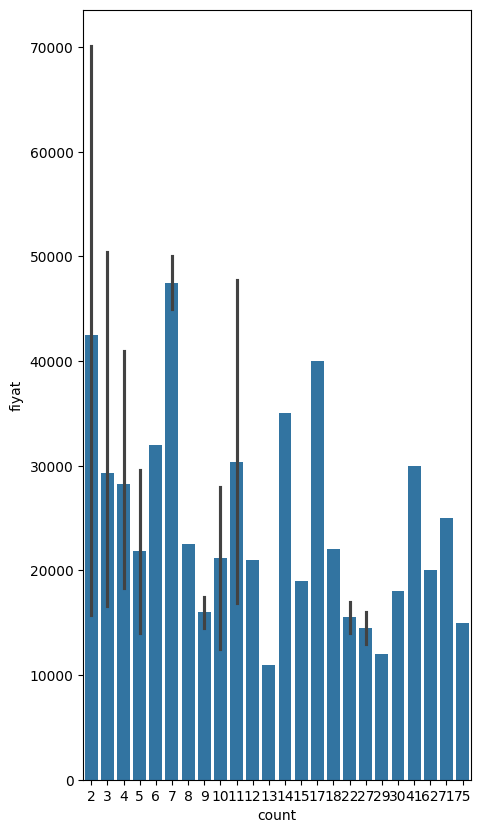

In [ ]:
p_id=dfMlb.value_counts('fiyat').sort_values(ascending=False).head(50)
plt.figure(figsize=(5,10))
sns.barplot(y=p_id.index,x=p_id)
plt.show()

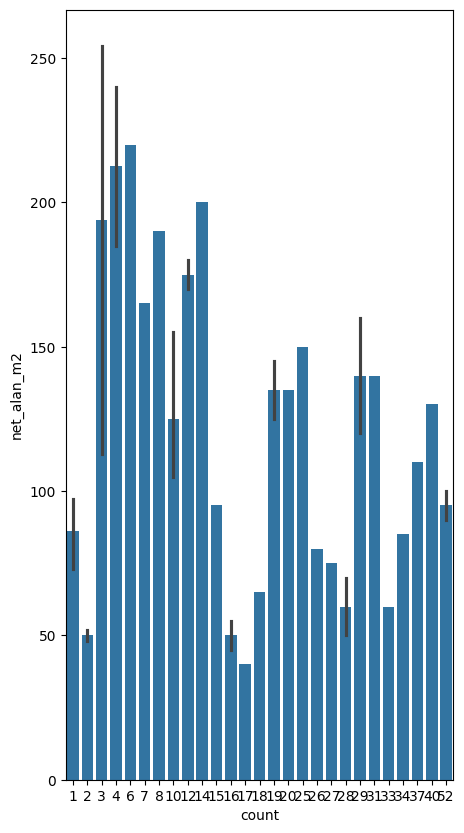

In [ ]:
p_id=dfMlb.value_counts('net_alan_m2').sort_values(ascending=False).head(50)
plt.figure(figsize=(5,10))
sns.barplot(y=p_id.index,x=p_id)
plt.show()

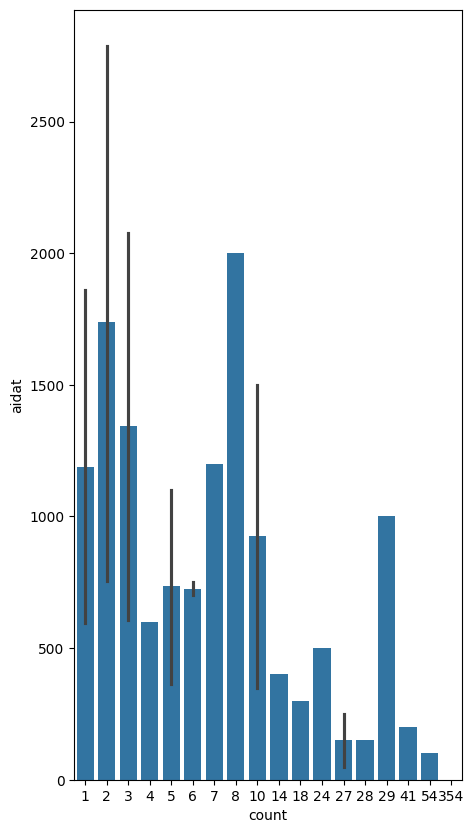

In [ ]:
p_id=dfMlb.value_counts('aidat').sort_values(ascending=False).head(50)
plt.figure(figsize=(5,10))
sns.barplot(y=p_id.index,x=p_id)
plt.show()

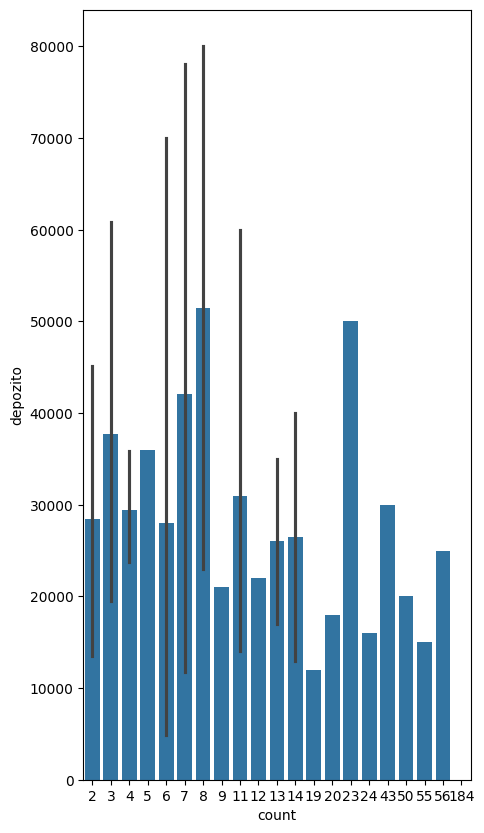

In [ ]:
p_id=dfMlb.value_counts('depozito').sort_values(ascending=False).head(50)
plt.figure(figsize=(5,10))
sns.barplot(y=p_id.index,x=p_id)
plt.show()

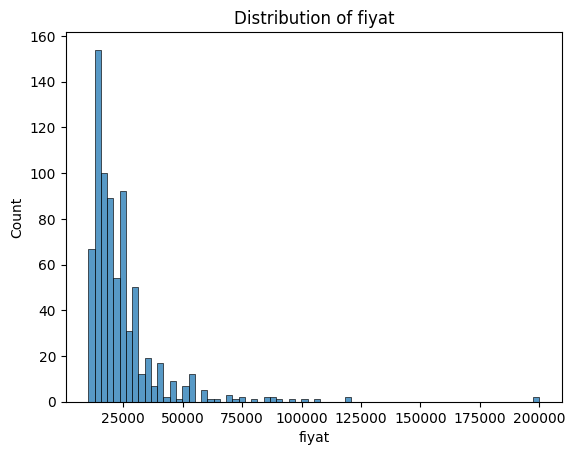

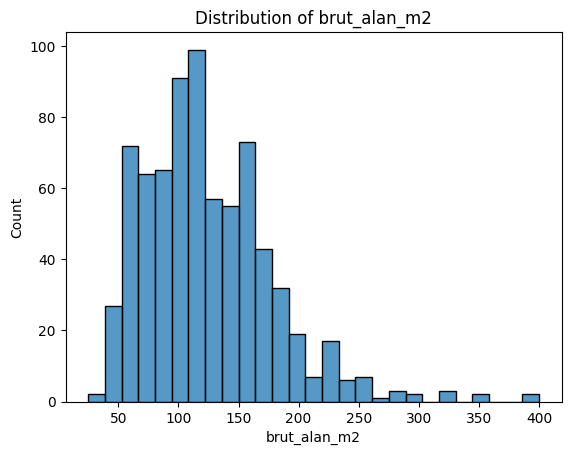

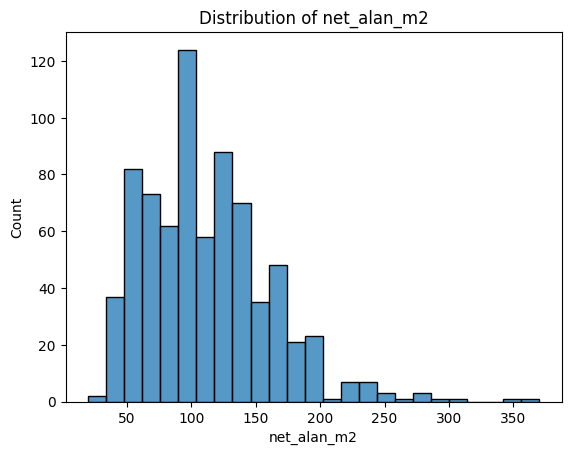

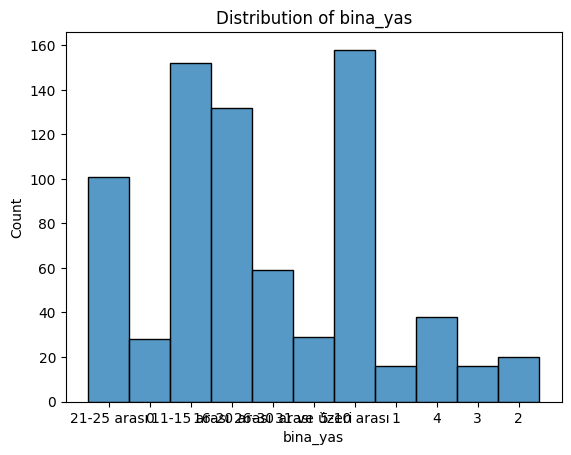

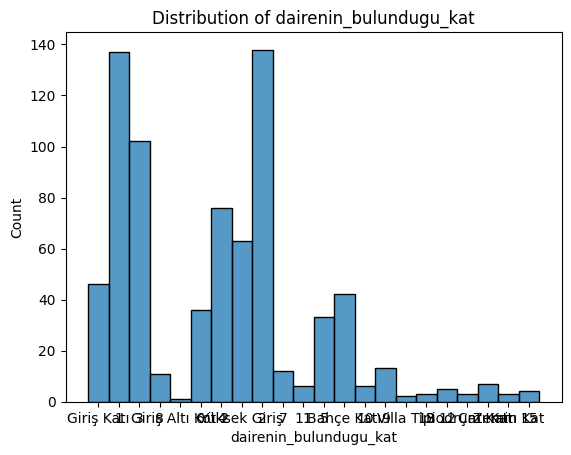

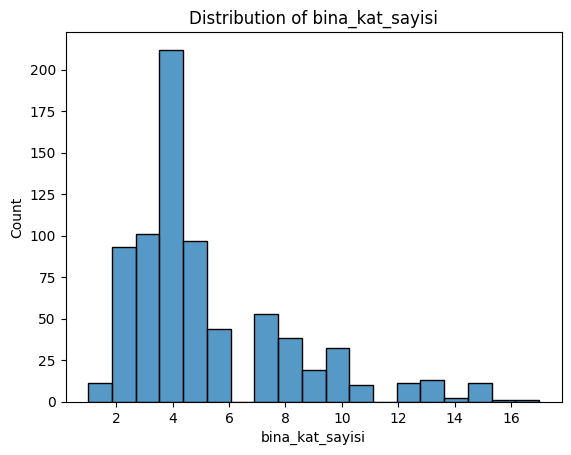

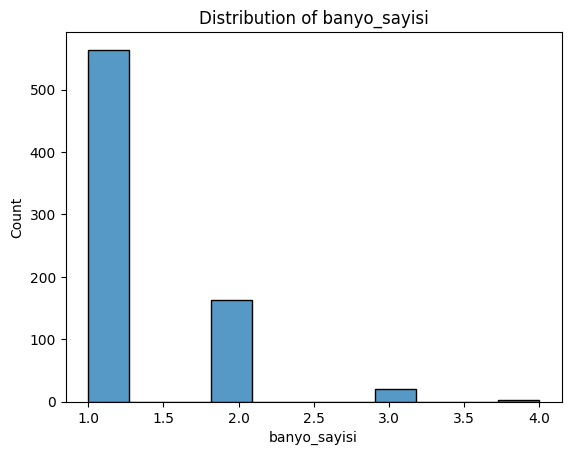

In [ ]:
for col in ['fiyat', 'brut_alan_m2', 'net_alan_m2', 'bina_yas', 'dairenin_bulundugu_kat', 'bina_kat_sayisi', 'banyo_sayisi']:
        sns.histplot(dfMlb[col])
        plt.title(f'Distribution of {col}')
        plt.show()

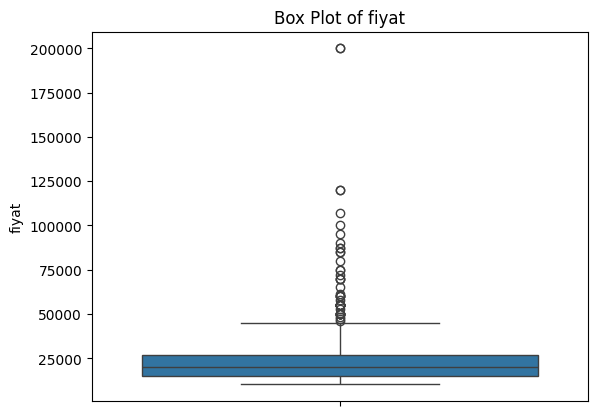

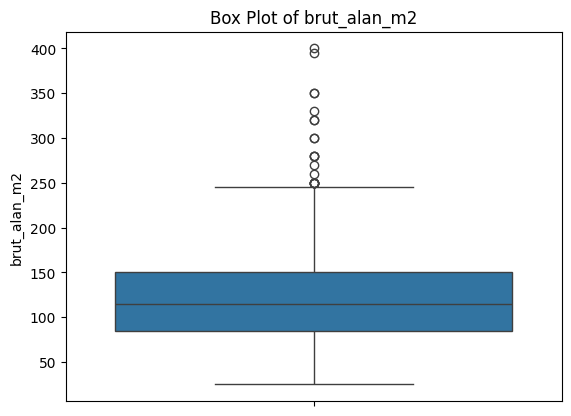

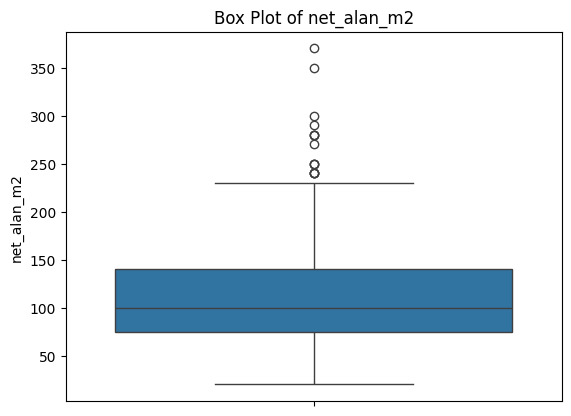

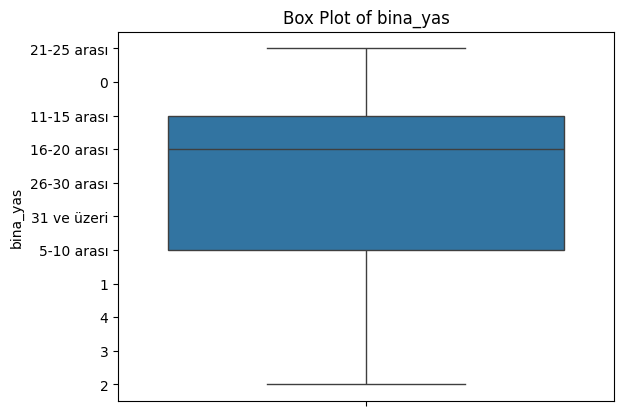

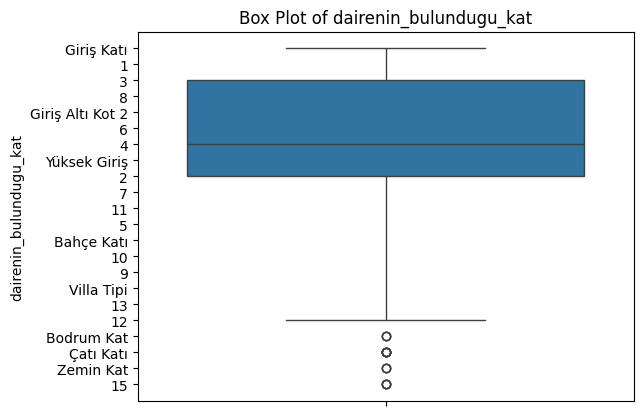

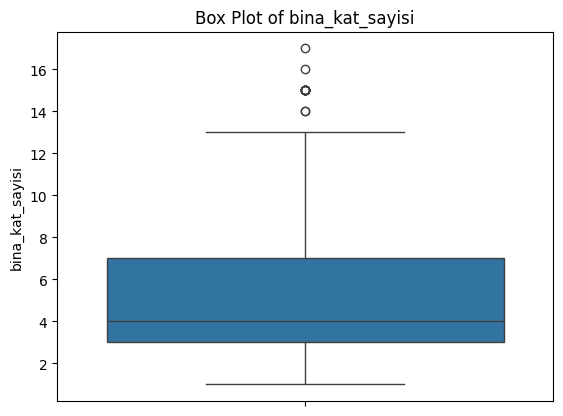

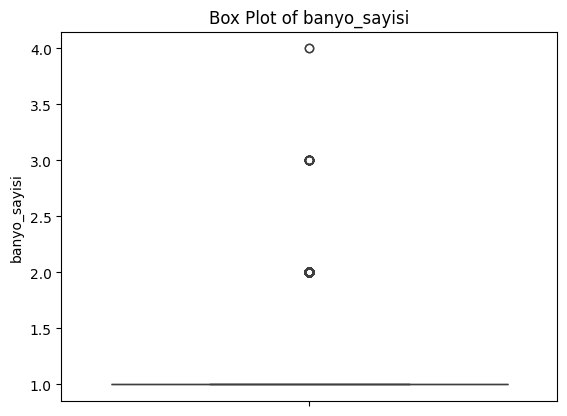

In [ ]:
for col in ['fiyat', 'brut_alan_m2', 'net_alan_m2', 'bina_yas', 'dairenin_bulundugu_kat', 'bina_kat_sayisi', 'banyo_sayisi']:
        sns.boxplot(dfMlb[col])
        plt.title(f'Box Plot of {col}')
        plt.show()

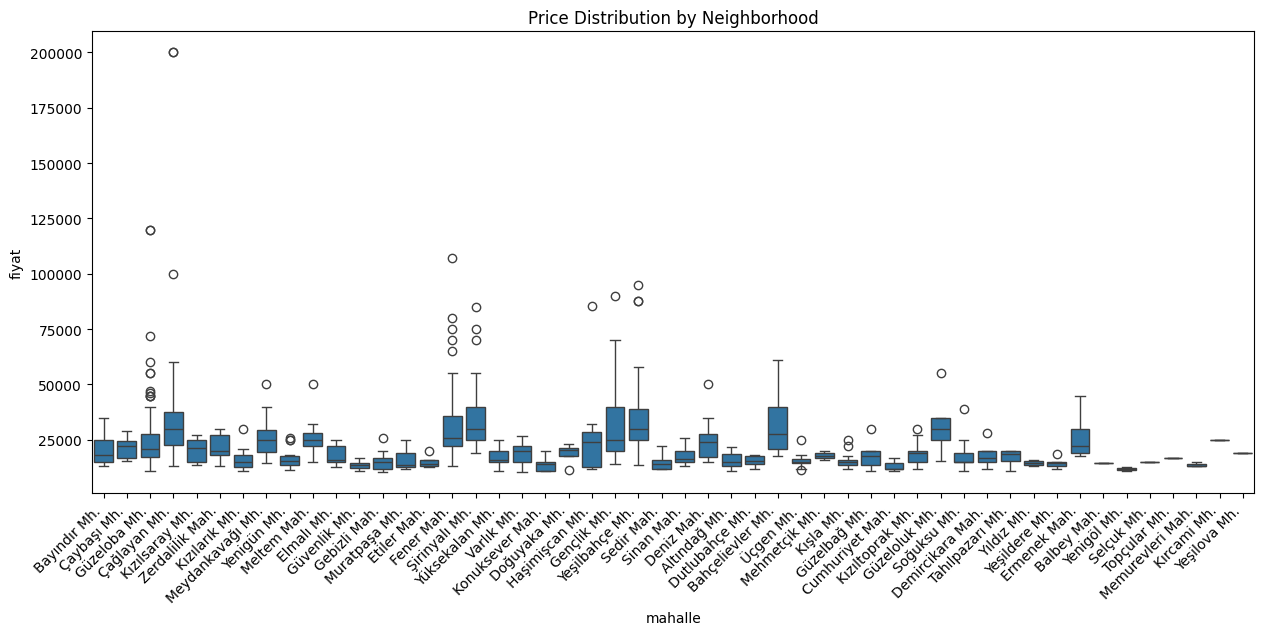

In [ ]:
plt.figure(figsize=(15, 6))  # Adjust width (15) as needed
sns.boxplot(x='mahalle', y='fiyat', data=dfMlb)
plt.title('Price Distribution by Neighborhood')
plt.xticks(rotation=45, ha='right')
plt.show()

# Data Preprocessing

In [297]:
# prompt: Why X_test and y_test have different number of rows fix that

# Select target as a series and features as dataframe
y = dfMlb.loc[:,['fiyat']].values.ravel()
X = dfMlb.drop(['fiyat'],axis=1)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8, test_size=0.2,random_state=1)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X_train: (4198, 15)
Shape of X_test: (1050, 15)
Shape of y_train: (4198,)
Shape of y_test: (1050,)
Shape of X: (5248, 15)
Shape of y: (5248,)


In [298]:
# Select categorical features
cols_cat = [col for col in X.columns if X[col].dtype == 'object' and X[col].nunique()<1000]
cols_cat

['Cephe',
 'Kullanım Durumu',
 'Isınma Tipi',
 'Yapı Tipi',
 'Ilce',
 'Yapının Durumu',
 'Mahalle',
 'Eşya Durumu',
 'Oda + Salon Sayısı',
 'Bulunduğu Kat']

In [280]:
for col in cols_cat:
    valid_values = set(X_train[col].unique())
    invalid_indices = ~X_test[col].isin(valid_values)
    X_test.drop(X_test[invalid_indices].index, inplace=True)
    y_test = y_test[~invalid_indices] # Use boolean indexing to filter NumPy array

In [284]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X_train: (4198, 15)
Shape of X_test: (1050, 15)
Shape of y_train: (4198,)
Shape of y_test: (1050,)
Shape of X: (5248, 15)
Shape of y: (5248,)


In [299]:
for col in cols_cat:
    valid_values = set(X_train[col].unique())
    invalid_indices = ~X_test[col].isin(valid_values)

    # Drop rows with invalid categories from X_test
    X_test = X_test.drop(X_test[invalid_indices].index)

    # Drop corresponding labels from y_test
    y_test = y_test[~invalid_indices]

    # Apply label encoding to the modified X_test
    # ... (Your label encoding code here)

    # Recalculate Xle_test (assuming this involves label encoding)
    # ... (Your Xle_test calculation code here)

print(Xle_test.shape)
print(y_test.shape)

(1041, 15)
(1041,)


In [300]:
# Label encoding on only categorical features

from sklearn.preprocessing import LabelEncoder

Xle_train = X_train.copy()
Xle_test = X_test.copy()
# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in cols_cat:
    Xle_train[col] = label_encoder.fit_transform(X_train[col])
    Xle_test[col] = label_encoder.transform(X_test[col])

In [301]:
print("Shape of Xle_test:", Xle_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of Xle_test: (1041, 15)
Shape of y_test: (1041,)


In [302]:
# Select numeric features
cols_num = [col for col in X.columns if X[col].dtype in ['int64', 'float64']]
Xnum = X[cols_num]

# Split numeric features into training and test sets
Xnum_train, Xnum_test, y_train, y_test = train_test_split(Xnum,y,train_size=0.8, test_size=0.2,random_state=1)

In [303]:
# Count number of missing values in each column of the training data
Xnum_train.isna().sum()

Banyo Sayısı       0
Kat Sayısı         0
Bina Yaşı          0
Site İçerisinde    0
Aidat              0
dtype: int64

# Supervised Learning

In [267]:
y.mean()

33133.57412347561

The mean of the rent prices are 33133

# Decision Tree

In [304]:
import sklearn
from sklearn.tree import DecisionTreeRegressor

mdlDtrMlb = DecisionTreeRegressor(random_state=1)

In [305]:
mdlDtrMlb.fit(Xle_train[cols_num + cols_cat], y_train)

DecisionTreeRegressor(random_state=1)

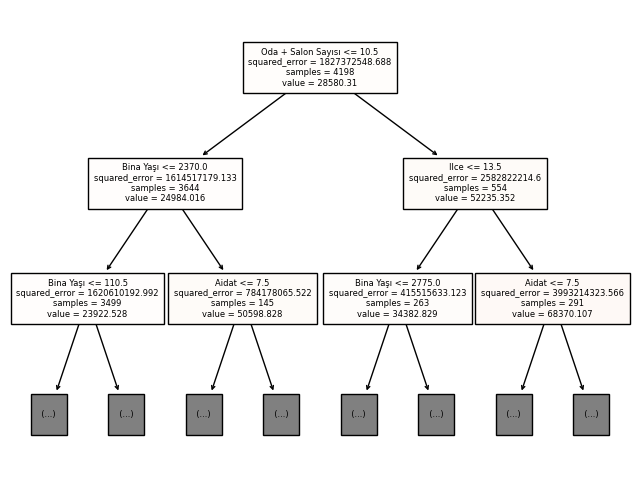

In [306]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6), dpi=100)
plot_tree(mdlDtrMlb, max_depth=2, feature_names=X.columns, fontsize= 6, filled=True)
plt.show()

In [307]:
print('First few houses:')
print(Xle_train[cols_num + cols_cat].head())
print('Price predictions:')
print(mdlDtrMlb.predict(Xle_train[cols_num + cols_cat].head()))

First few houses:
      Banyo Sayısı  Kat Sayısı  Bina Yaşı  Site İçerisinde        Aidat  \
892            1.0           3         25                1   150.000000   
273            1.0           5         36                1   891.847311   
1298           2.0           3         15                1   200.000000   
4452           1.0           5          3                1   300.000000   
1824           2.0           3         25                1  1700.000000   

      Cephe  Kullanım Durumu  Isınma Tipi  Yapı Tipi  Ilce  Yapının Durumu  \
892       8                1            6          1    14               2   
273       6                1            6          1    13               2   
1298      3                3            6          1    14               2   
4452      2                1            6          1     5               2   
1824     12                1            7          1    14               2   

      Mahalle  Eşya Durumu  Oda + Salon Sayısı  Bulunduğu Kat 

In [308]:
from sklearn.metrics import mean_absolute_error
y_pred = mdlDtrMlb.predict(Xle_test[cols_num + cols_cat])
print('MAE:')
print(mean_absolute_error(y_test,y_pred))

MAE:


ValueError: Found input variables with inconsistent numbers of samples: [1050, 1041]

In [ ]:
def get_mae(mx_lf_nds, X_trn, X_tst, y_trn, y_tst):

    mdlDtrMlbDpt = DecisionTreeRegressor(max_leaf_nodes=mx_lf_nds, random_state=1)

    mdlDtrMlbDpt.fit(X_trn,y_trn)

    y_tst_prd = mdlDtrMlbDpt.predict(X_tst)

    mae = mean_absolute_error(y_tst, y_tst_prd)

    return(mae)

In [ ]:

for i in [5, 50, 500, 50000]:
  mae = get_mae(i, Xle_train[cols_num + cols_cat], Xle_test[cols_num + cols_cat], y_train, y_test)
  print('Max leaf nodes: ',i, '\t Mean Absolute Error: ',mae)

Max leaf nodes:  5 	 Mean Absolute Error:  8353.513266393198
Max leaf nodes:  50 	 Mean Absolute Error:  6642.587891506123
Max leaf nodes:  500 	 Mean Absolute Error:  6171.7
Max leaf nodes:  50000 	 Mean Absolute Error:  6171.7


## Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Function for building and scoring Random Forest models
def get_random_forest_mae(X_trn, X_tst, y_trn, y_tst):
    mdlRfsMlb = RandomForestRegressor(random_state=1)
    mdlRfsMlb.fit(X_trn, y_trn)
    y_tst_prd = mdlRfsMlb.predict(X_tst)
    mae = mean_absolute_error(y_tst, y_tst_prd)
    return (mae)

In [ ]:
# Encode and Build/Score using all  columns

mae = get_random_forest_mae(Xle_train[cols_num + cols_cat], Xle_test[cols_num + cols_cat], y_train, y_test)
print("MAE from all  columns:")
print(mae)

MAE from all  columns:
4382.049933333334


## Gradient Boosted Tree

In [ ]:
from xgboost import XGBRegressor

#Build and score default Gradient Boosting Model
mdlXgbMlb = XGBRegressor()
mdlXgbMlb.fit(Xle_train[cols_num + cols_cat], y_train)
y_test_pred = mdlXgbMlb.predict(Xle_test[cols_num + cols_cat])
mae = mean_absolute_error(y_test_pred, y_test)

print("MAE from default XGBoost model:")
print(mae)

MAE from default XGBoost model:
4381.1657421875


In [ ]:
#Build and score a tuned Gradient Boosting Model
mdlXgbMlb = XGBRegressor(n_estimators=5000, learning_rate=0.01, max_depth=5)
mdlXgbMlb.fit(Xle_train[cols_num + cols_cat], y_train)
y_test_pred = mdlXgbMlb.predict(Xle_test[cols_num + cols_cat])
mae = mean_absolute_error(y_test_pred, y_test)

print("MAE from tuned XGBoost model:")
print(mae)

MAE from tuned XGBoost model:
4262.935533854166


In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [3000, 5000, 7000],  # Number of trees
    'learning_rate': [0.01, 0.1, 0.3],  # Step size shrinkage
    'max_depth': [3, 5, 7]  # Maximum depth of each tree
}

# Create an XGBoost regressor object
xgb_model = xgb.XGBRegressor()

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           scoring='neg_mean_absolute_error', cv=5, verbose=2)

# Fit the grid search to the training data
grid_search.fit(Xle_train[cols_num + cols_cat], y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

# Make predictions using the best model
y_test_pred = best_model.predict(Xle_test[cols_num + cols_cat])

# Calculate the mean absolute error
mae = mean_absolute_error(y_test_pred, y_test)

print("MAE from tuned XGBoost model:")
print(mae)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END .learning_rate=0.01, max_depth=3, n_estimators=3000; total time=   0.9s
[CV] END .learning_rate=0.01, max_depth=3, n_estimators=3000; total time=   0.9s


KeyboardInterrupt: 

# CATBoost

In [ ]:
!pip install catboost==1.2.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 4.5 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
model = CatBoostRegressor(iterations=100, learning_rate=0.1, depth=6, loss_function='RMSE')

param_grid = {
    'iterations': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5]
}


In [ ]:
# Assuming 'X' is your feature data and 'y' is your target variable
model.fit(Xle_train[cols_num + cols_cat], y_train)

0:	learn: 16780.8417624	total: 47.5ms	remaining: 4.7s
1:	learn: 16284.6720976	total: 49.1ms	remaining: 2.4s
2:	learn: 15852.1102352	total: 50.1ms	remaining: 1.62s
3:	learn: 15300.1752654	total: 51.1ms	remaining: 1.23s
4:	learn: 14784.7705207	total: 52.2ms	remaining: 992ms
5:	learn: 14454.3615418	total: 52.8ms	remaining: 827ms
6:	learn: 14121.7625092	total: 53.9ms	remaining: 716ms
7:	learn: 13724.1831354	total: 54.9ms	remaining: 631ms
8:	learn: 13374.5596879	total: 55.8ms	remaining: 565ms
9:	learn: 13025.7524072	total: 56.8ms	remaining: 511ms
10:	learn: 12666.5583668	total: 57.7ms	remaining: 467ms
11:	learn: 12467.6610462	total: 58.7ms	remaining: 431ms
12:	learn: 12184.3962878	total: 59.7ms	remaining: 399ms
13:	learn: 11969.4571023	total: 60.6ms	remaining: 372ms
14:	learn: 11719.6336719	total: 61.5ms	remaining: 349ms
15:	learn: 11467.4178241	total: 62.4ms	remaining: 328ms
16:	learn: 11236.3436619	total: 63.4ms	remaining: 310ms
17:	learn: 11044.5326883	total: 64.4ms	remaining: 293ms
18:	

In [ ]:
# Assuming 'model' is your trained CatBoostRegressor
y_pred = model.predict(Xle_test[cols_num + cols_cat])

In [ ]:
from sklearn.metrics import mean_absolute_error as mae # Import the mean_absolute_error function and alias it as 'mae'

mae_value = mae(y_test, y_pred)
print("MAE:", mae_value)

MAE: 6404.7


Hyperparamter Tuning of CATboost

In [ ]:
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV

In [ ]:
model = CatBoostRegressor()

# Define the hyperparameter grid to search over
param_grid = {
    'iterations': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5]
}

In [ ]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')
# cv is the number of cross-validation folds, scoring metric is negative MAE for minimization

In [ ]:
grid_search.fit(Xle_train[cols_num + cols_cat], y_train)  # Assuming you have your data prepared

Streaming output truncated to the last 5000 lines.
0:	learn: 17387.0210666	total: 1.82ms	remaining: 362ms
1:	learn: 16905.2459682	total: 3.89ms	remaining: 385ms
2:	learn: 16363.1154663	total: 5.87ms	remaining: 386ms
3:	learn: 15802.4528890	total: 7.95ms	remaining: 390ms
4:	learn: 15295.9327933	total: 9.97ms	remaining: 389ms
5:	learn: 14859.8152125	total: 12ms	remaining: 387ms
6:	learn: 14357.9566846	total: 13.9ms	remaining: 384ms
7:	learn: 13945.5079671	total: 15.8ms	remaining: 379ms
8:	learn: 13610.4799007	total: 17.8ms	remaining: 378ms
9:	learn: 13247.5158340	total: 20ms	remaining: 379ms
10:	learn: 12984.0328872	total: 22ms	remaining: 377ms
11:	learn: 12680.3128469	total: 23.9ms	remaining: 375ms
12:	learn: 12427.0767920	total: 25.9ms	remaining: 372ms
13:	learn: 12204.2185571	total: 27.7ms	remaining: 368ms
14:	learn: 11918.2889782	total: 29.7ms	remaining: 366ms
15:	learn: 11669.6380287	total: 31.6ms	remaining: 363ms
16:	learn: 11391.5534092	total: 34.2ms	remaining: 368ms
17:	learn: 11

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostRegressor object at 0x7b8d83668e80>,
             param_grid={'depth': [4, 6, 8], 'iterations': [50, 100, 200],
                         'l2_leaf_reg': [1, 3, 5],
                         'learning_rate': [0.01, 0.1, 0.2]},
             scoring='neg_mean_absolute_error')

In [ ]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

Best Parameters: {'depth': 6, 'iterations': 200, 'l2_leaf_reg': 5, 'learning_rate': 0.1}


In [ ]:
from sklearn.metrics import mean_absolute_error as mae

y_pred = best_model.predict(Xle_test[cols_num + cols_cat])
mae_value = mae(y_test, y_pred)
print("MAE on Test Set:", mae_value)

MAE on Test Set: 4551.193530292332


# Support Vector Regression

In [ ]:
from sklearn.svm import SVR

In [ ]:
model = SVR(kernel='linear')  # Choose an appropriate kernel
model.fit(Xle_train[cols_num + cols_cat], y_train)

SVR(kernel='linear')

In [ ]:
y_pred = model.predict(Xle_test[cols_num + cols_cat])

In [ ]:
mae_value = mae(y_test, y_pred)
print("MAE on Test Set:", mae_value)

MAE on Test Set: 5638.067168425864


# Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
model = Ridge(alpha=1.0)  # Adjust alpha (regularization strength) as needed
model.fit(Xle_train[cols_num + cols_cat], y_train)

In [ ]:
y_pred = model.predict(Xle_test[cols_num + cols_cat])

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Lasso Regression

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
model = Lasso(alpha=1.0)  # Adjust alpha (regularization strength) as needed
model.fit(Xle_train[cols_num + cols_cat], y_train)

Lasso()

In [ ]:
y_pred = model.predict(Xle_test[cols_num + cols_cat])

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 5798.938392178274


In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

In [ ]:
grid_search = GridSearchCV(estimator=Lasso(), param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')

In [ ]:
grid_search.fit(Xle_train[cols_num + cols_cat], y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.486e+10, tolerance: 1.223e+07
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.086e+10, tolerance: 1.540e+07
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.940e+10, tolerance: 1.597e

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_absolute_error')

In [ ]:
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_
print("Best Parameters:", best_params)

Best Parameters: {'alpha': 100}


In [ ]:
y_pred = best_estimator.predict(Xle_test[cols_num + cols_cat])
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error with Best Estimator:", mae)

Mean Absolute Error with Best Estimator: 5695.060845373487


# Unsupervised Learning

## Takeaways

* Expanded the model to include other Numerical features, and replaced missing values by *Imputation*
* Included Categorical features, and converted them to usable information by *Label Encoding*
* Ensembled many decision trees more intelligently using the *Gradient Boosting* model and *Parameter Tuning* for better results

WHITEBOARD >>

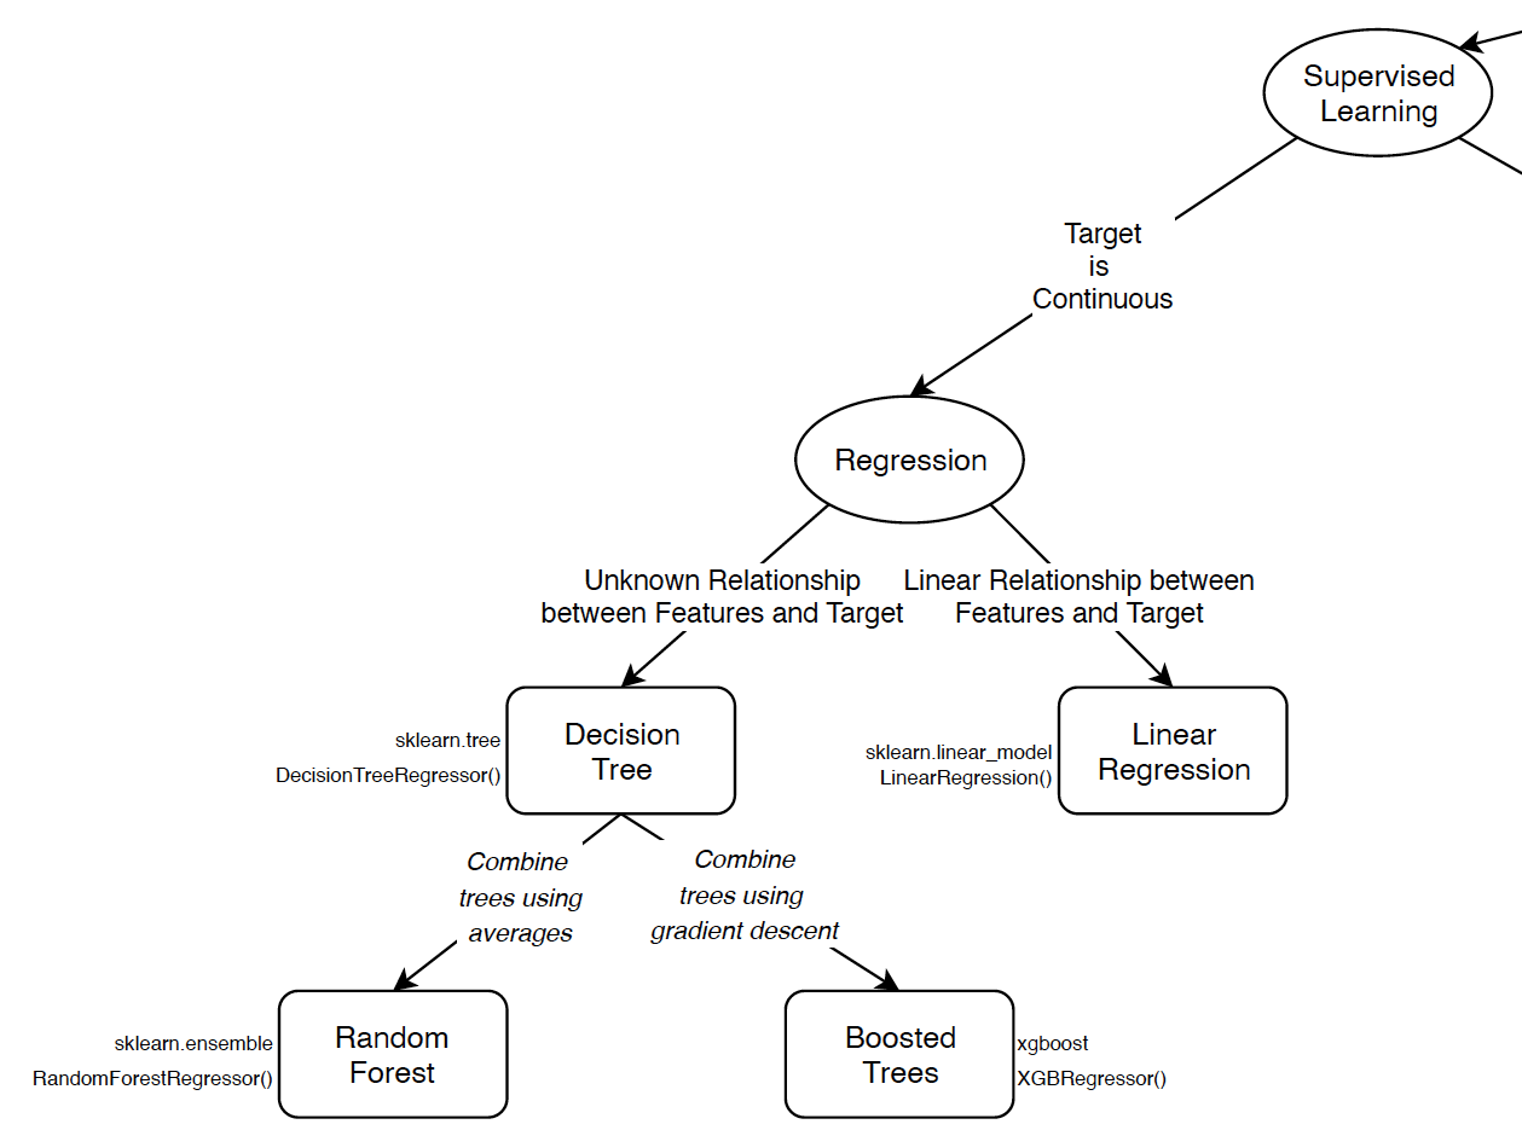

<< WHITEBOARD

utexas_ds_orie_divider_gray.png